# General Trees 

There are two classical implementations of general trees : 

- Either as a list of nodes each containing as a list of children 
- Or implemented through binary trees ; in that case the two children of 
  a node $N$ in a binary tree respectively correspond to first child of 
  $N$ and right sibling. 
  
The primitive `display`, available in each sub-module representing data structures
in the algopy module enables to display trees on within a jupyter notebook.

In [1]:
from algopy import tree
from algopy import treeasbin

from algopy.tree import Tree
from algopy.treeasbin import TreeAsBin

## Implementation : `tuple` - variant

In [2]:
def tutoEx1():
    C1 = Tree(3, [Tree(-6), Tree(10)])
    C2 = Tree(8, [Tree(11, [Tree(0), Tree(4)]), Tree(2), Tree(5)])
    C3 = Tree(9)
    return Tree(15, [C1, C2, C3])

In [3]:
L = tutoEx1()

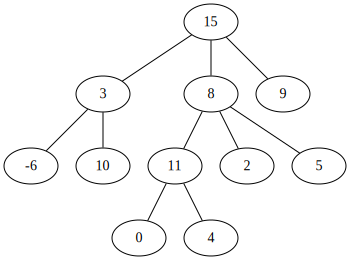

In [4]:
tree.display(L)

## Implementation : `first-child right-sibling` - variant

In [5]:
def tutoEx2():
    C1 = TreeAsBin(3, TreeAsBin(-6, None, TreeAsBin(10)))
    C2 = TreeAsBin(8, TreeAsBin(11, TreeAsBin(0, None, TreeAsBin(4)), 
                                TreeAsBin(2, None, TreeAsBin(5))))
    C3 = TreeAsBin(9)
    C1.sibling = C2
    C2.sibling = C3
    return TreeAsBin(15, C1, None)

In [6]:
LTAB = tutoEx2()

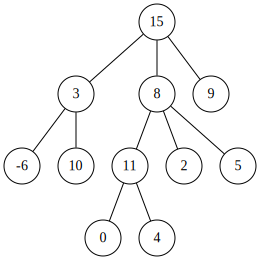

In [7]:
treeasbin.display(LTAB)

# 1. Measures

## 1.1 Size

### <b> <font color = blue> What is it? </font> </b>

The number of nodes of tree.

### <b> <font color = blue> Compute size </font> </b>

#### Implementation : `tuple`- variant

In [6]:
def size (T):
    n = 1
    for child in T.children:
        n += size(child)
    return n

In [7]:
size(L)

11

#### Implementation : `first-child right-sibling`-variant

In [8]:
def size_asbin (T):
    if T is None:
        return 0
    else:
        return 1 + size_asbin(T.child) + size_asbin(T.sibling)

In [9]:
size_asbin(LTAB)

11

In [10]:
def size_asbin_(T):
    n = 1
    C = T.child
    while C:
        n += size_asbin_(C)
        C = C.sibling
    return n

In [11]:
size_asbin_(LTAB)

11

## 1.2 Height

### <b> <font color = blue> What is the height of a tree? </font> </b>

It's the maximum of depths of nodes. The depth of a node being the number of parent-child link from root to node. 

### <b> <font color = blue> Compute the height of a tree. </font> </b>

#### Implementation : `tuple` - variant

In [12]:
def height (T):
    h = 0
    for child in T.children:
        h = max(h, 1 + height(child))
    return h

In [13]:
height(L)

3

In [15]:
def height_(T):
    if not T.children:
        return 0
    else:
        return max([1 + height_(child) for child in T.children])

In [16]:
height_(L)

3

#### Implementation : `first-child right-sibling` - variant

In [17]:
def height_asbin (T):
    h = 0
    C = T.child
    while C:
        h = max(h, 1 + height_asbin(C))
        C = C.sibling
    return h

In [18]:
height_asbin(LTAB)

3

In [19]:
def height_asbin_(T):
    if T is None:
        return -1
    else:
        return max(1 + height_asbin_(T.child), height_asbin_(T.sibling))

In [20]:
height_asbin_(LTAB)

3

## 1.3 Average External Depth

### <b> <font color = blue> What is it? </font> </b>

The sum of lenght of leaves divided by the number of leaves.

### <b> <font color = blue> Compute it. </font> </b>

#### Implementation : `tuple` - variant

In [8]:
def _aed(T, h=0):
    if not T.children:
        return 1, h
    else:
        nbl, sumep = 0, 0
        for child in T.children:
            (n, s) = _aed(child, h + 1)
            nbl += n
            sumep += s
        return nbl, sumep

In [9]:
def aed(T):
    (n, epl) = _aed(T)
    return epl / n

In [10]:
aed(L)

2.142857142857143

In [11]:
def _aed_(T, h=0):
    if T.nbchildren == 0:
        return 1, h
    else:
        nbl, sumep = 0, 0
        for index in range(T.nbchildren):
            (n, s) = _aed(T.children[index], h + 1)
            nbl += n
            sumep += s
        return nbl, sumep

In [13]:
def aed_(T):
    (n, epl) = _aed_(T)
    return epl / n

In [15]:
aed(L)

2.142857142857143

#### Implementation : `first-child right-sibling` - variant

In [16]:
def _aed_asbin(T, h=0):
    if not T.child:
        return 1, h
    else:
        nbl, sumep = 0, 0
        C = T.child
        while C:
            (n, s) = _aed_asbin(C, h + 1)
            nbl += n
            sumep += s
            C = C.sibling
        return nbl, sumep

In [17]:
def aed_asbin(T):
    (s, ep) = _aed_asbin(T)
    return ep / s

In [18]:
aed_asbin(LTAB)

2.142857142857143

# 2. Traversals

## 2.1 Depth First Traversals

### <b> <font color = blue> What is the principle of such traversal? </font> </b>

Keep tree on your left and go on visiting tree nodes keeping this constraint.

### <b> <font color = blue> List keys encountered in preorder and postorder of DFT. </font> </b>

#### preoreder encounter of keys.

15 3 -6 10 8 11 0 4 2 5 9

#### postorder encounter of keys

-6 10 3 0 4 11 2 5 8 9 15

### <b> <font color = blue> What other treatments can one do? </font> </b>

Intermediate orders.

### <b> <font color = blue> Write down DFTs </font> </b>

#### Implementation : `tuple` - variant

In [31]:
def dft(T):
    #print("Key in preorder is : {}".format(T.key))
    #This includes leaf treatment.
    if T.nbchildren > 0:
        for i in range(T.nbchildren - 1):
            dft(T.children[i])
            print("Key in intermediate orders: {}".format(T.key))
        dft(T.children[-1])
        #print("Key in postorder is : {}".format(T.key))

In [32]:
dft(L)

Key in intermediate orders: 3
Key in intermediate orders: 15
Key in intermediate orders: 11
Key in intermediate orders: 8
Key in intermediate orders: 8
Key in intermediate orders: 15


#### Implementation : `first-child right-sibling` - variant

In [33]:
def dft_asbin(T):
    if T.child:
        #preoder treatment
        C = T.child
        while C.sibling:
            dft_asbin(C)
            C = C.sibling
            #intermerdiate treatment on T
        dft_asbin(C)
        #postorder treatment
    else:
        print("Leaf: {}".format(T.key))
        #leaf treatment

## 2.2 Breadth First Traversal

### <b> <font color = blue> What is the gist of it? </font> </b>

We visit nodes of the tree level-per-level from left to right. This traversal doesn't respect the recursive structure of the tree. To enable such a traversal one needs a FIFO. 

### <b> <font color = blue> How does one detect level change? </font> </b>

Either by using two queues one for current treated nodes and the other for the level to come, or using a marker marking end of level.

### The `queue` module

Here is the interface for the `queue` module.

In [19]:
from algopy import queue
from algopy.queue import Queue

Here is a use example.

In [20]:
q = Queue()

q

In [38]:
for i in range(10):
    q.enqueue(i)

In [39]:
while not q.isempty():
    print(q.dequeue())

0
1
2
3
4
5
6
7
8
9


In [40]:
q.isempty()

True

### <b> <font color = blue> Write a BFT printing keys one level per line. </font> </b>

#### Implementation : `tuple` - variant

In [41]:
def bft(T):
    q = Queue()
    f = Queue()
    q.enqueue(T)
    while not q.isempty():
        node = q.dequeue()
        print(node.key, end=" ")
        for child in node.children:
            f.enqueue(child)
        if q.isempty():
            f, q = q, f
            print()

In [42]:
bft(L)

15 
3 8 9 
-6 10 11 2 5 
0 4 


### Compute Width of a General Tree

In [43]:
def tree_width(T):
    q = Queue()
    f = Queue()
    width, l_width = 0, 0
    q.enqueue(T)
    while not q.isempty():
        node = q.dequeue()
        l_width += 1
        for child in node.children:
            f.enqueue(child)
        if q.isempty():
            f, q = q, f
            width = max(width, l_width)
            l_width = 0
    return width

#### Implementation : `first-child right-sibling` - variant

In [44]:
def BFT_asbin(B):
    q = Queue()
    q.enqueue(B)
    q.enqueue(None)
    while not q.isempty():
        node = q.dequeue()
        if node:
            print(node.key, end=' ')
            child = node.child          
            while child:
                q.enqueue(child)
                child = child.sibling
        else:
            print()
            if not q.isempty():
                q.enqueue(None)

In [45]:
BFT_asbin(LTAB)

15 
3 8 9 
-6 10 11 2 5 
0 4 


# Applications

## Exercice 3.1 

Write down a function returning list of preorder-postorder encounters of keys in a DFS.

#### `tuple`-variant

In [48]:
def __prefsuff(T, L):
    L.append(T.key)
    for child in T.children:
        __prefsuff(child, L)
    L.append(T.key)
    
def prefsuff(T):
    L = []
    __prefsuff(T, L)
    return L

In [49]:
prefsuff(L)

[15, 3, -6, -6, 10, 10, 3, 8, 11, 0, 0, 4, 4, 11, 2, 2, 5, 5, 8, 9, 9, 15]

#### `first-child right-sibling` -variant

In [50]:
def __prefsuff_asbin(T, L):
    L.append(T.key)
    C = T.child
    while C:
        __prefsuff_asbin(C,L)
        C = C.sibling
    L.append(T.key)

def prefsuff_asbin(T):
    L = []
    __prefsuff_asbin(T,L)
    return L
    

## Exercise 3.2

Write a function that builds a linear representation (as a string) from a tree.

#### `tuple`- variant

In [51]:
def to_string(T):
    s = "({}".format(T.key)
    for child in T.children:
        s += to_string(child)
    s += ")"
    return s

In [52]:
to_string(L)

'(15(3(-6)(10))(8(11(0)(4))(2)(5))(9))'

#### `first-child right-sibling`-variant

In [55]:
def to_string_asbin(T):
    s = "({}".format(T.key)
    C = T.child
    while C:
        s += to_string_asbin(C)
        C = C.sibling
    s += ")"
    return s

In [54]:
to_string_asbin(LTAB)

'(15(3(-6)(10))(8(11(0)(4))(2)(5))(9))'

## Exercice 3.3

Write down a function computing average arity of a general tree, implemented using `first-child right-sibling`-variant.

In [55]:
def __average_arity(T):
    nb_children = 0
    nb_internal_nodes = 0
    C = T.child
    if C:
        nb_internal_nodes += 1
    while C:
        nb_children += 1
        call = __average_arity(C)
        nb_children += call[0]
        nb_internal_nodes += call[1]
        C = C.sibling
    return nb_children, nb_internal_nodes

def average_arity(T):
    nb_children, nb_internal_nodes = __average_arity(T)
    if nb_internal_nodes > 0:
        return nb_children/nb_internal_nodes
    else:
        raise Exception("Isolated root.")

In [56]:
average_arity(LTAB)

2.5

## Exercise 3.4

In [28]:
def tree_to_dot(T):
    s = "graph {\n"
    q = Queue()
    q.enqueue(T)
    while not q.isempty():
        node = q.dequeue()
        for child in node.children:
            line = "\t {} -- {}".format(node.key, "{};\n")
            line = line.format(child.key)
            s += line
            q.enqueue(child)
    s += "}"
    return s

In [30]:
print(tree_to_dot(L))

graph {
	 15 -- 3;
	 15 -- 8;
	 15 -- 9;
	 3 -- -6;
	 3 -- 10;
	 8 -- 11;
	 8 -- 2;
	 8 -- 5;
	 11 -- 0;
	 11 -- 4;
}


In [25]:
def tree_to_dot_(T):
    Q = Queue()
    res = "graph {\n"
    Q.enqueue(T)
    while not Q.isempty():
        A = Q.dequeue()
        if A.children:
            res +="      "+ str(A.key) +" -- {"
            for i in range(A.nbchildren - 1):
                res+= str(A.children[i].key) + "; "
                Q.enqueue(A.children[i])
            res += str(A.children[-1].key) + "};\n"
            Q.enqueue(A.children[-1])
    return res + "}"

In [26]:
print(tree_to_dot_(L))

graph {
      15 -- {3; 8; 9};
      3 -- {-6; 10};
      8 -- {11; 2; 5};
      11 -- {0; 4};
}


In [33]:
def asbin_to_dot(B):
    Q = Queue()
    res = "graph {\n"
    Q.enqueue(B)
    while not Q.isempty():
        node = Q.dequeue()
        if node.child:
            res += "      "+ str(node.key) +" -- {"
            C = node.child
            while C.sibling:
                res += str(C.key) + "; "
                Q.enqueue(C)
                C = C.sibling
            res += str(C.key) + "};\n"
            Q.enqueue(C)
    return res + "}"

In [34]:
print(asbin_to_dot(LTAB))

graph {
      15 -- {3; 8; 9};
      3 -- {-6; 10};
      8 -- {11; 2; 5};
      11 -- {0; 4};
}


## Exercise 3.5

Write conversions of a general tree from `tuple`-variant to `first-child right-sibling`-variant and vice-versa.

#### From `tuple`-variant to `first-child right-sibling` one

In [39]:
def tree_to_bin(T):
    B = TreeAsBin(T.key, None, None)
    R = B
    if T.children:
        R.child = tree_to_bin(T.children[0])
        R = R.child
        for i in range(1,T.nbchildren):
            R.sibling = tree_to_bin(T.children[i])
            R = R.sibling
    return B

In [42]:
print(asbin_to_dot(tree_to_bin(L)))

graph {
      15 -- {3; 8; 9};
      3 -- {-6; 10};
      8 -- {11; 2; 5};
      11 -- {0; 4};
}


#### From `first-child right-sibling`-variant to `tuple` one

In [43]:
def bin_to_tuple(B):
    T = Tree(B.key)
    B = B.child
    while B:
        T.children.append(bin_to_tuple(B))
        B = B.sibling
    return T

In [46]:
print(tree_to_dot(bin_to_tuple(LTAB)))

graph {
	 15 -- 3;
	 15 -- 8;
	 15 -- 9;
	 3 -- -6;
	 3 -- 10;
	 8 -- 11;
	 8 -- 2;
	 8 -- 5;
	 11 -- 0;
	 11 -- 4;
}


## Exercise 3.6

Write down a function that loads a file of `.tree` type in both tree implementations we've been manipulating.

#### `tuple`-variant

In [47]:
def __load(t_file, i):
    s = ""
    while t_file[i]!= '(' and t_file[i]!= ')':
        s += t_file[i]
        i += 1
    root = Tree(s, [])
    while t_file[i] != ')':
        c, i = __load(t_file, i+1)
        root.children.append(c)
    return root, i+1

def load(t_file):
    T = None
    if t_file:
        T, i = __load(t_file, 1)
    return T

In [48]:
load("")

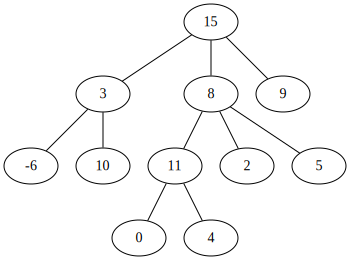

In [52]:
tree.display(load(to_string(L)))

#### `first-child right-sibling`-variant

In [53]:
def __load_asbin(t_file, i, l):
    tree = None
    if i < l and t_file[i] == '(':
        new_key = ""
        i += 1
        while t_file[i] not in "()":
            new_key += t_file[i]
            i += 1
        tree = TreeAsBin(new_key, None, None)
        tree.child, i = __load_asbin(t_file, i, l)
        i += 1
        tree.sibling, i = __load_asbin(t_file, i, l)
    return tree, i

def load_asbin(t_file):
    tree = __load_asbin(t_file, 0, len(t_file))[0]
    return tree

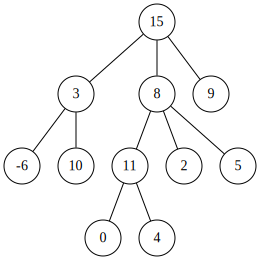

In [56]:
treeasbin.display(load_asbin(to_string_asbin(LTAB)))